# SKIN DISORDER PREDICTION MODEL

You have three key tasks:

Data Analysis Report – Perform exploratory data analysis (EDA).
Predictive Model – Build a classification model.
Medical Insights – Provide suggestions for early disease detection.

Task 1: Data Analysis Report (EDA)
Steps:
✔ Check Missing Values & Data Types
✔ Feature Distribution & Class Imbalance
✔ Correlation Analysis
✔ Feature Importance

## DOMAIN ANALYSIS
This database contains 34 attributes, 33 of which are linear valued and one of them is
nominal.The differential diagnosis of erythemato-squamous diseases is a real problem
in dermatology. They all share the clinical features of erythema and scaling, with very
little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen
planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is
necessary for the diagnosis but unfortunately these diseases share many
histopathological features as well. Another difficulty for the differential diagnosis is that a
disease may show the features of another disease at the beginning stage and may have
the characteristic features at the following stages. Patients were first evaluated clinically
with 12 features. Afterwards, skin samples were taken for the evaluation of 22
histopathological features. The values of the histopathological features are determined
by an analysis of the samples under a microscope.In the dataset constructed for this
domain, the family history feature has the value 1 if any of these diseases has been
observed in the family, and 0 otherwise. The age feature simply represents the age of
the patient. Every other feature (clinical and histopathological) was given a degree in
the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the
largest amount possible, and 1, 2 indicate the relative intermediate values.The names
and id numbers of the patients were recently removed from the database.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv("dataset1.csv")

In [8]:
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [9]:
df.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

## Basic Checks (DATA UNDERSTANDING)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

almost all features are integer accept AGE 

there is 35 columns are there

In [19]:
# Summary statistics

df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

NOTE:  Many features have a median of 0
Some have higher variance and skewness
Max values indicate class-based or ordinal features

In [23]:
# Check missing values
print(df.isnull().sum())

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

NOTE: ** NO NULL VALUES ARE THERE
'
Ag'e variable has object datatype we have to change in integer. and some value are invalid value we have to replace them by help of measure of tendency (mean,median,mode)

In [27]:

df.loc[df['Age']=='?','Age']


33     ?
34     ?
35     ?
36     ?
262    ?
263    ?
264    ?
265    ?
Name: Age, dtype: object

In [29]:
# Replace non-numeric values with NaN
df.replace('?', np.nan, inplace=True)

In [31]:
# 8 is replaced with nan values from ?

print(df['Age'].isna().sum())  # Should print 8
print(df['Age'].unique())  # Should show nan in the list


8
['55' '8' '26' '40' '45' '41' '18' '57' '22' '30' '20' '21' '10' '65' '38'
 '23' '17' '51' '42' '44' '33' '43' '50' '34' nan '15' '46' '62' '35' '48'
 '12' '52' '60' '32' '19' '29' '25' '36' '13' '27' '31' '28' '64' '39'
 '47' '16' '0' '7' '70' '37' '61' '67' '56' '53' '24' '58' '49' '63' '68'
 '9' '75']


In [34]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\2404743633.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [38]:
df['Age'] = df['Age'].astype('int64')
print(df['Age'].dtype)  # Now it will print int64


int64


In [59]:
df.loc[df['Age']<11]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
1           3        3                 3        2                   1   
13          2        3                 3        0                   0   
20          2        1                 1        2                   0   
26          1        1                 0        1                   0   
31          3        2                 0        2                   0   
60          2        2                 1        1                   0   
83          3        2                 2        1                   0   
119         1        1                 1        1                   1   
122         1        1                 2        0                   0   
126         2        2                 2        0                   0   
163         2        2                 0        0                   0   
184         2        2                 1        0                   0   
239         2        2                 2        1                   0   
240         3        2                 0        0                   0   
266         2        2                 1        1                   0   
268         2        2                 1        1                   0   
295         2        1                 0        2                   0   
343         2        2                 2        0                   0   
348         3        2                 2        0                   0   
349         2        2                 1        0                   0   
351         2        2                 2        3                   2   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
1                    0                   0                         0   
13                   0                   0                         0   
20                   0                   3                         0   
26                   0                   3                         0   
31                   0                   0                         0   
60                   0                   1                         0   
83                   0                   0                         0   
119                  0                   0                         0   
122                  0                   3                         0   
126                  0                   2                         0   
163                  0                   2                         0   
184                  0                   3                         0   
239                  0                   2                         0   
240                  0                   2                         0   
266                  0                   2                         0   
268                  0                   2                         0   
295                  0                   0                         0   
343                  0                   1                         0   
348                  0                   3                         0   
349                  0                   2                         0   
351                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
1                             1                  1  ...   
13                            1                  1  ...   
20                            1                  2  ...   
26                            1                  0  ...   
31                            0                  0  ...   
60                            1                  1  ...   
83                            0                  0  ...   
119                           2                  2  ...   
122                           3                  0  ...   
126                           2                  0  ...   
163                           1                  1  ...   
184                           2                  0  ...   
239                           2               

Patient more than 5 and less than 10 age having high chance of having class 6 skin dieases problem

In [62]:
# no duplicated values
df.duplicated().value_counts()

False    366
Name: count, dtype: int64

In [64]:
#df.dtypes

In [66]:
df.shape

(366, 35)

In [68]:
df.ndim

2

In [70]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

### TARGET FEATURE ANALYSIS

In [73]:
df['class'].unique()      # TARGET col unique  values

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [75]:
df['class'].value_counts(True)
      #count for each unique value in feature

class
1    0.306011
3    0.196721
2    0.166667
5    0.142077
4    0.133880
6    0.054645
Name: proportion, dtype: float64

In [78]:
df['class'].value_counts().rename('count'),
df['class'].value_counts(True).rename('%').mul(100)

#percentage for count vise uniques values

class
1    30.601093
3    19.672131
2    16.666667
5    14.207650
4    13.387978
6     5.464481
Name: %, dtype: float64

## Exploratory Data Analysis

In [82]:
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

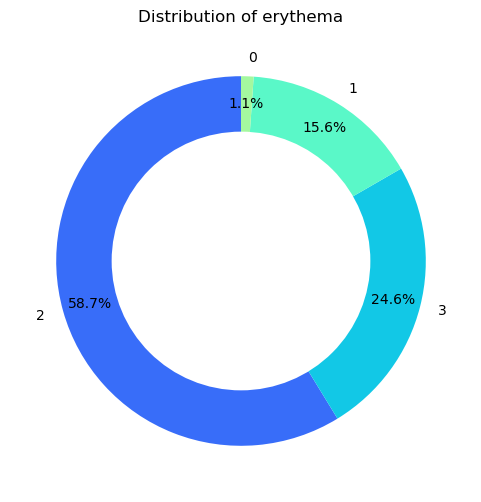

In [84]:
import numpy as np

feature = 'erythema'
data = df[feature].value_counts(normalize=True)

plt.figure(figsize=(6,6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette("rainbow"))

# Draw a white circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)


plt.title(f'Distribution of {feature}')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\1528127616.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='class', palette=["green", "orange"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\1528127616.py:1: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df, x='class', palette=["green", "orange"])


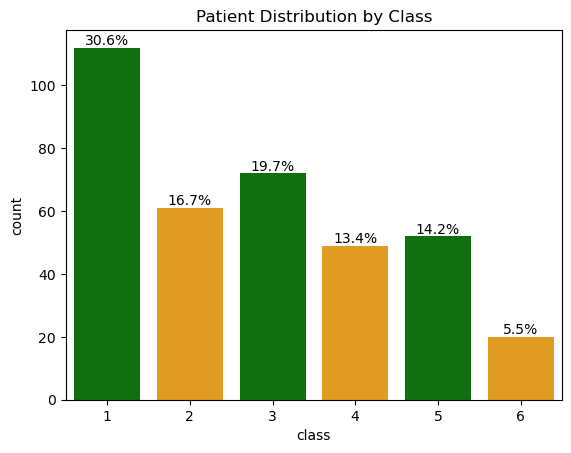

In [85]:
ax = sns.countplot(data=df, x='class', palette=["green", "orange"])

# Add percentage labels
total = len(df)
for p in ax.patches:
    ax.annotate(f'{100 * p.get_height() / total:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title('Patient Distribution by Class')
plt.show()


NOTE:  target column represent different categories of skin disorders. 
1 → Eczema
2 → Psoriasis
3 → Acne
4 → Melanoma
5 → Dermatitis
6 → Vitiligo
These numbers are just encoded labels used for classification, making it easier for machine learning models to differentiate between different types of skin diseases. The actual disease names would typically be mapped to these numerical labels in your dataset.

In [90]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('-'*80)
print('Numerical Variables Column: ',num_features)

Number of numerical variables:  35
--------------------------------------------------------------------------------
Numerical Variables Column:  ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band-like_infiltrate', 'Age', 'class']


#### for numerical features

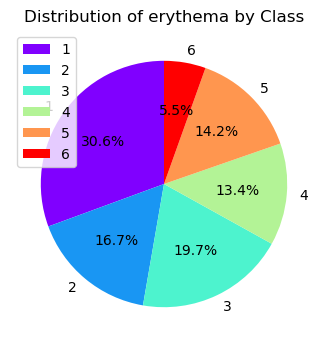

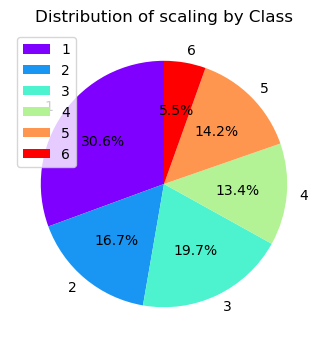

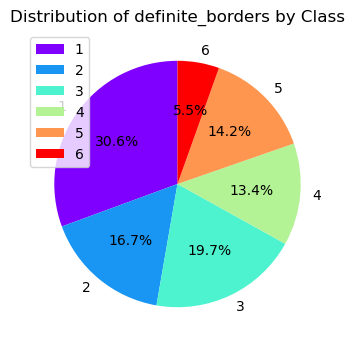

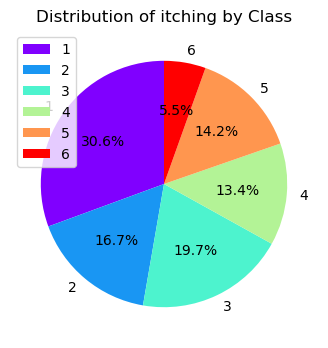

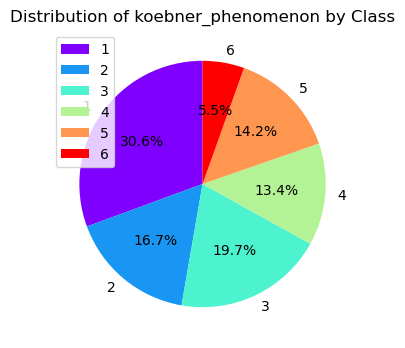

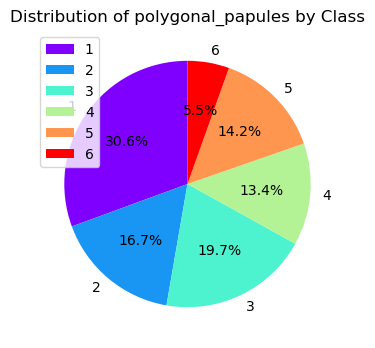

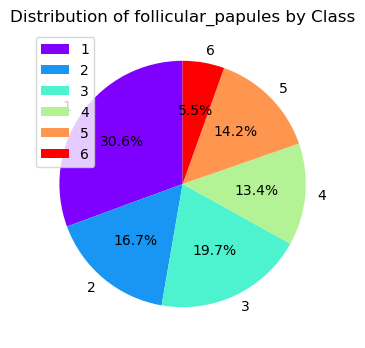

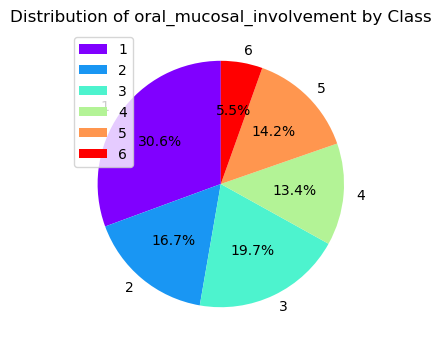

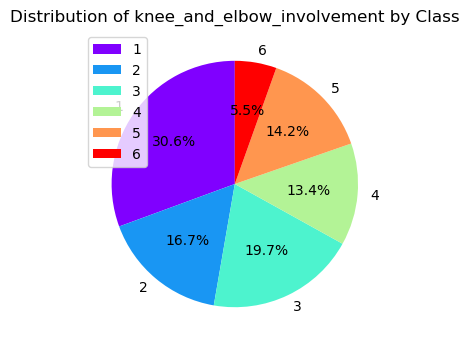

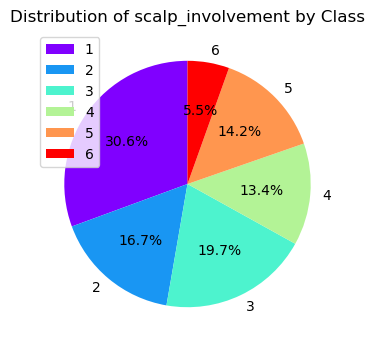

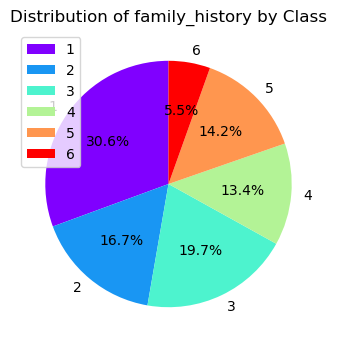

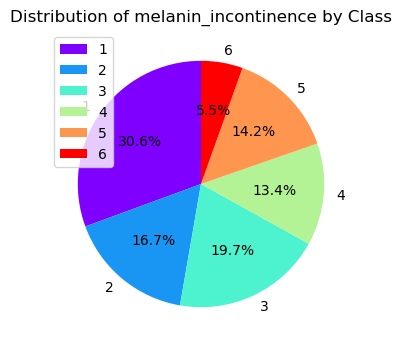

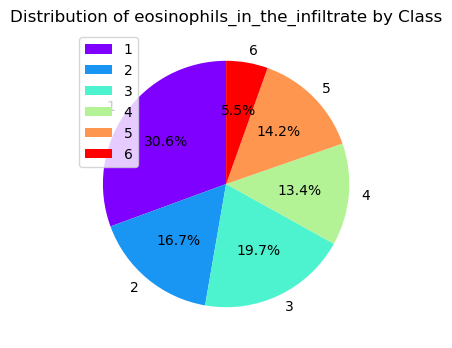

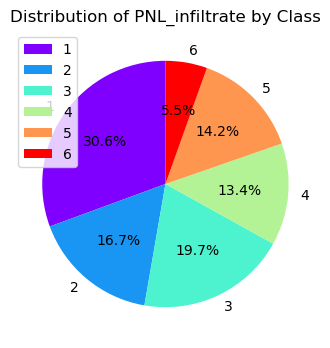

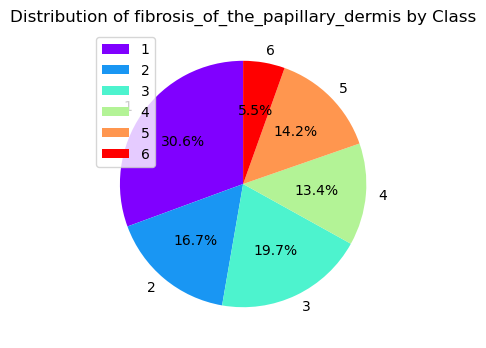

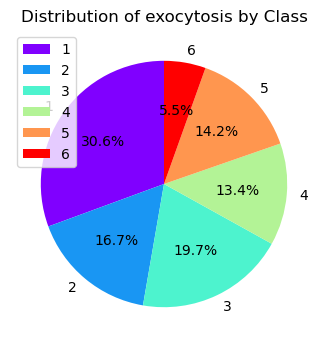

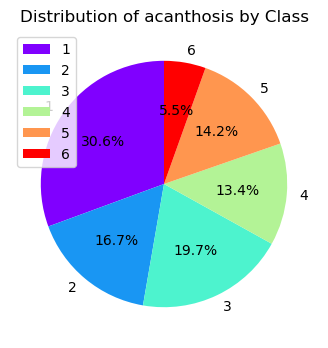

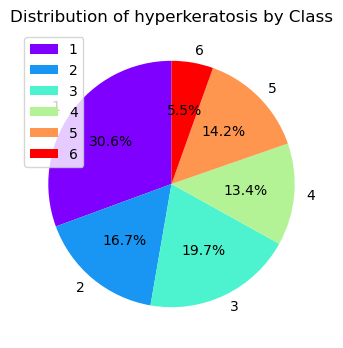

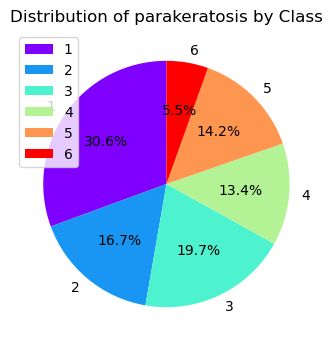

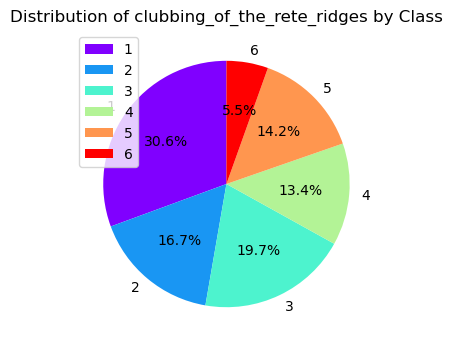

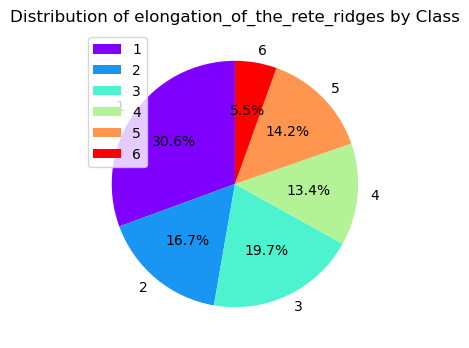

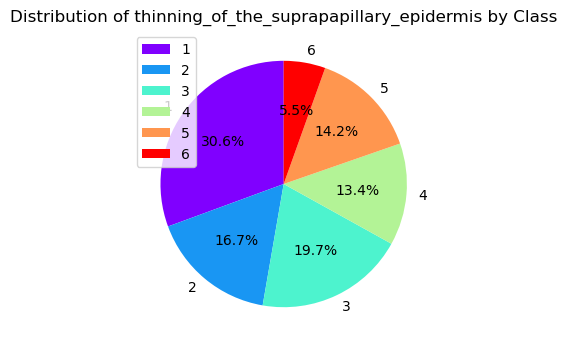

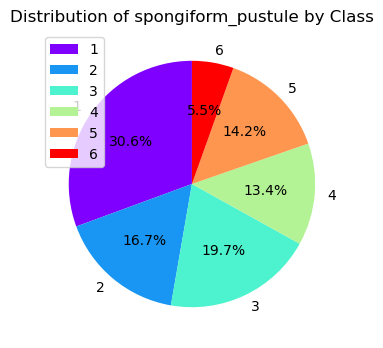

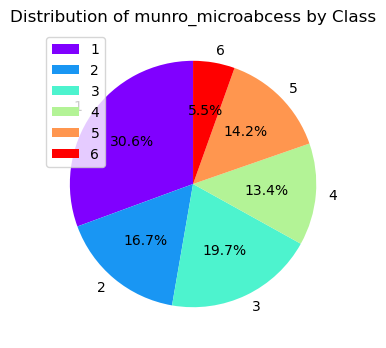

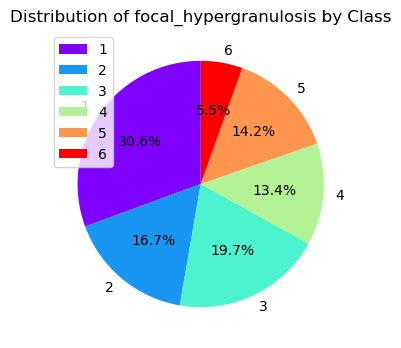

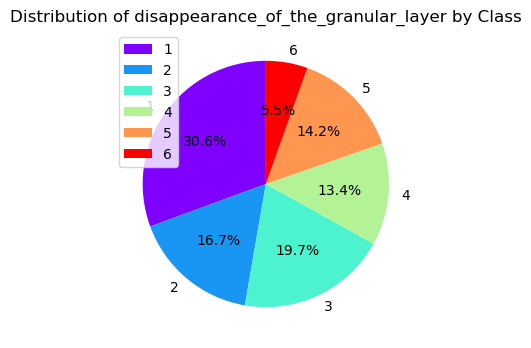

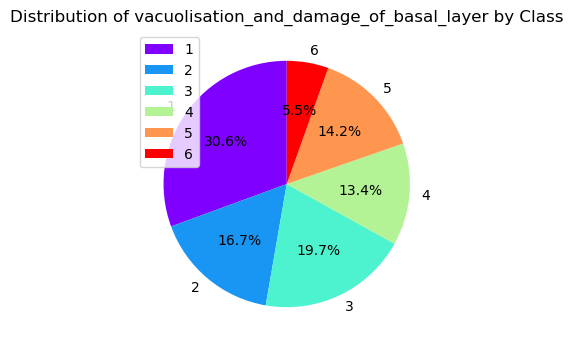

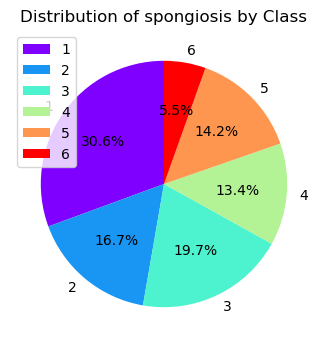

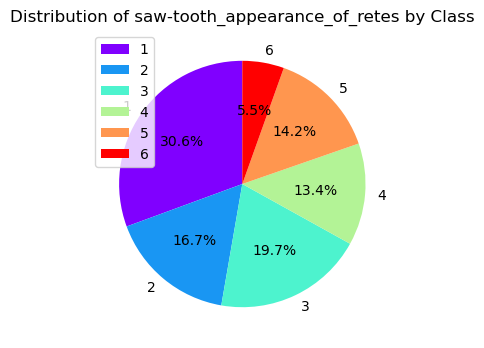

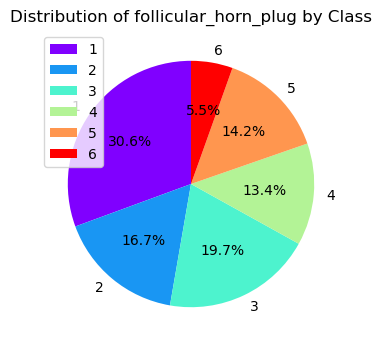

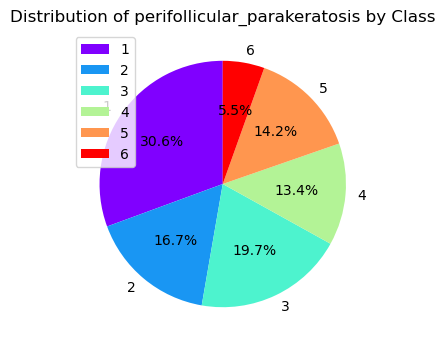

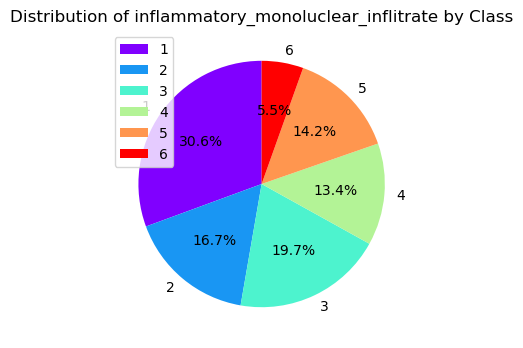

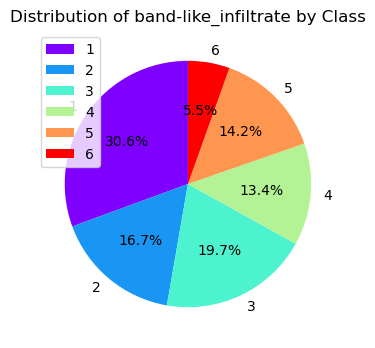

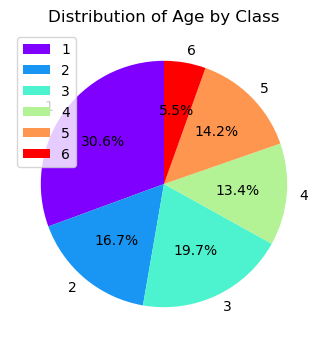

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

<Figure size 400x400 with 0 Axes>

In [94]:
for col in num_features:
    plt.figure(figsize=(4, 4), dpi=100)
    
    data = df.groupby(col)['class'].value_counts().unstack()
    
    # Plot a pie chart 
    data.sum().plot.pie(autopct='%1.1f%%', startangle=90, colormap='rainbow', legend=True)
    
    plt.title(f'Distribution of {col} by Class')
    plt.ylabel('')  # Hide y-label
    plt.show()


#### for Categorical features 

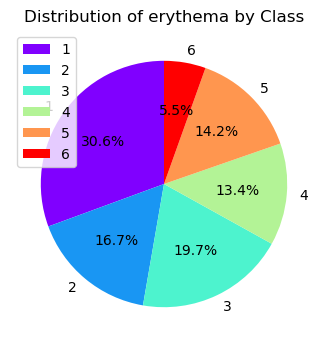

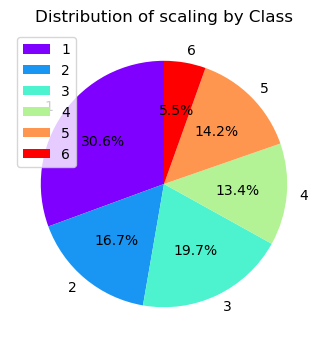

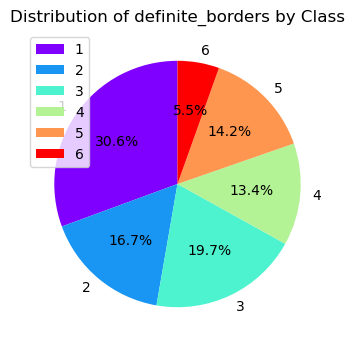

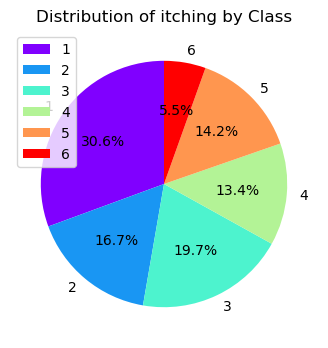

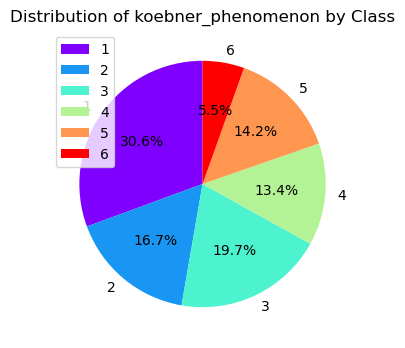

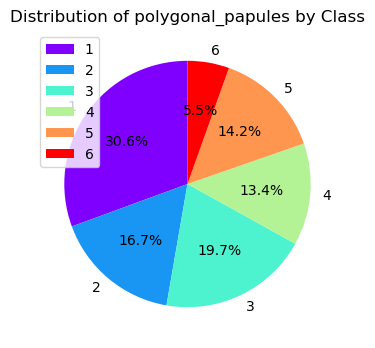

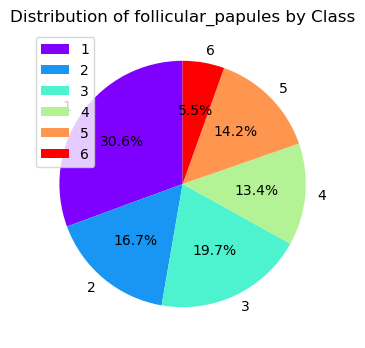

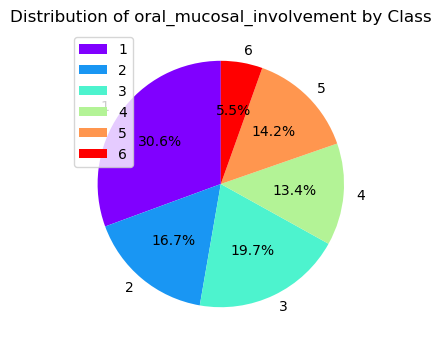

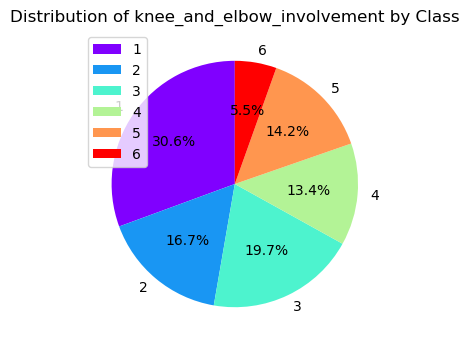

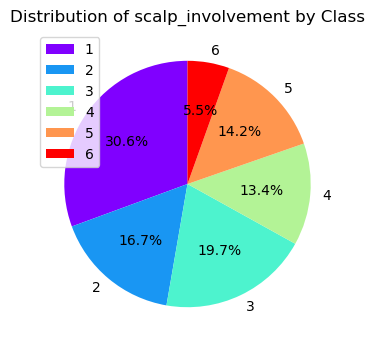

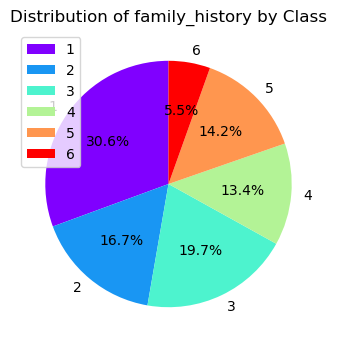

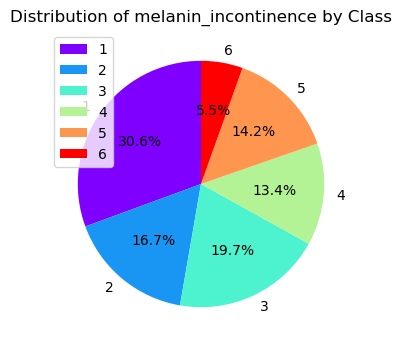

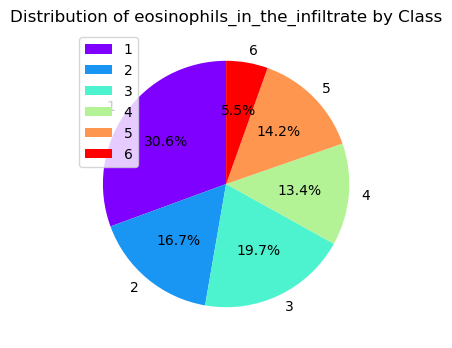

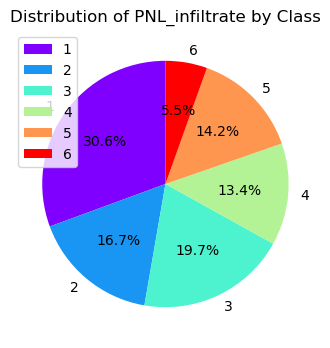

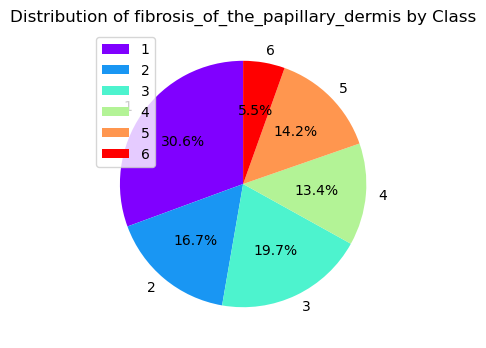

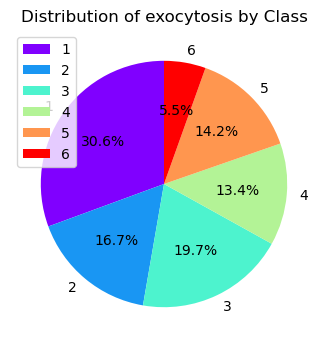

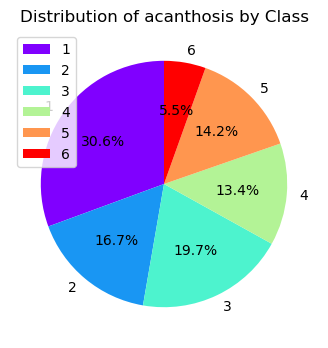

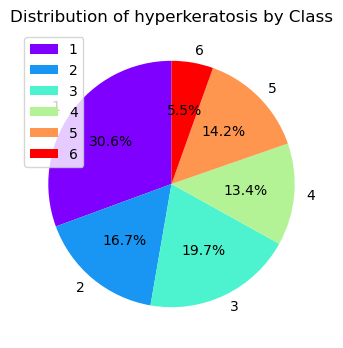

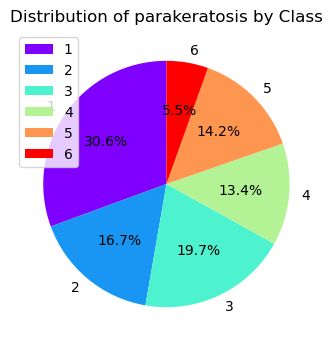

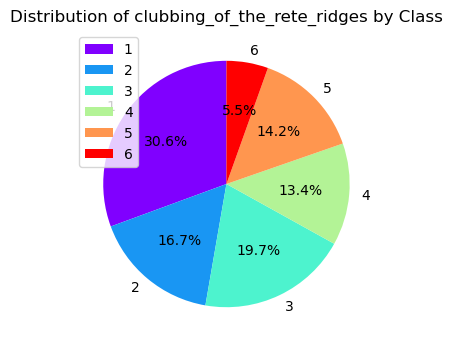

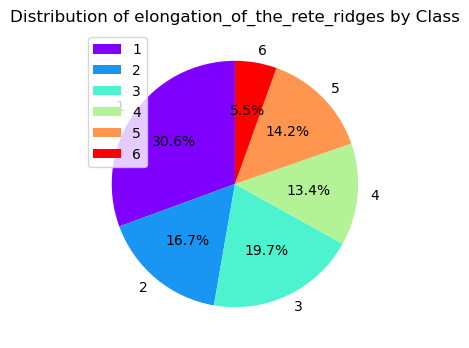

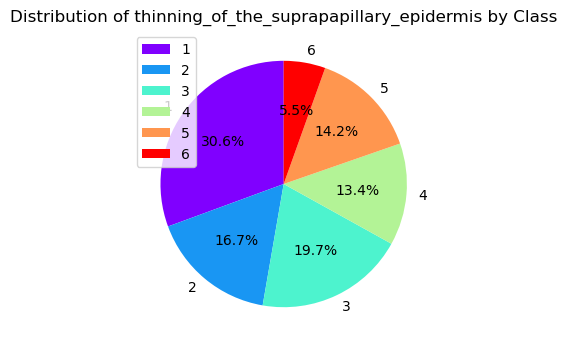

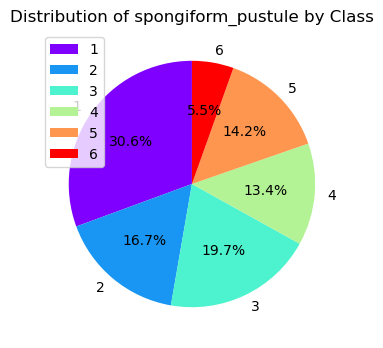

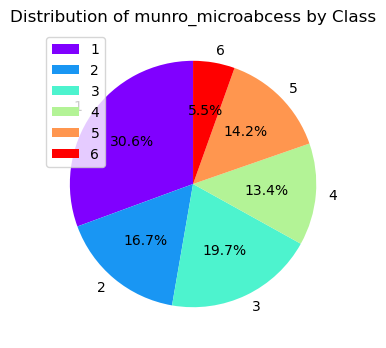

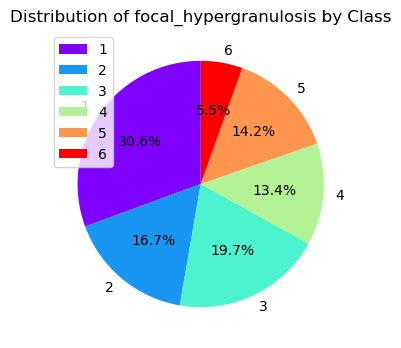

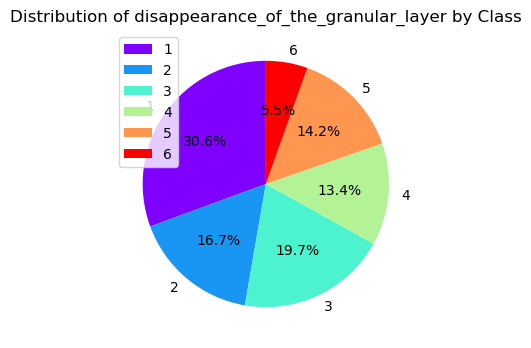

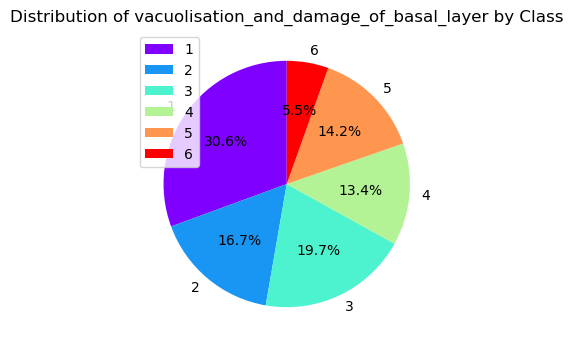

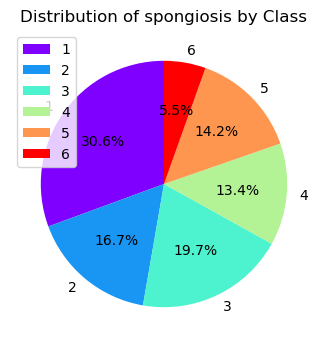

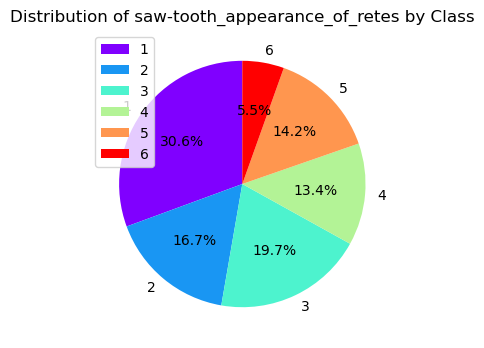

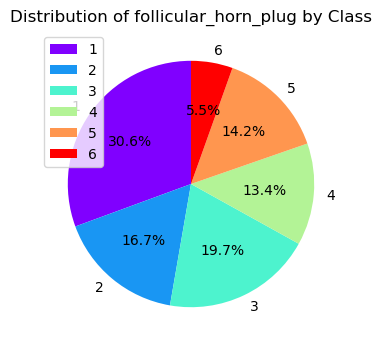

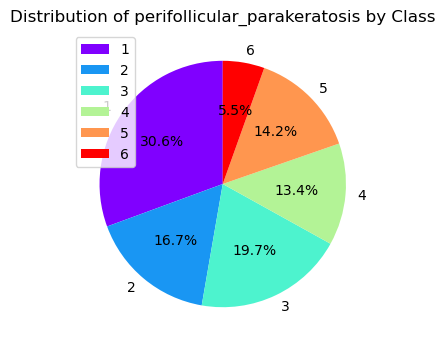

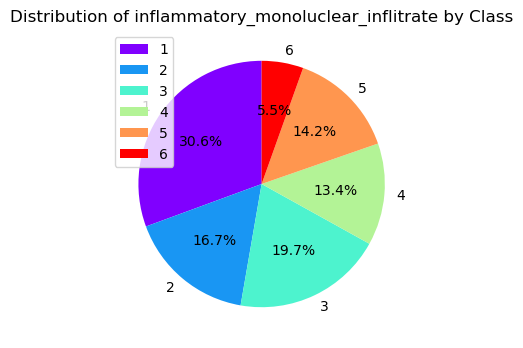

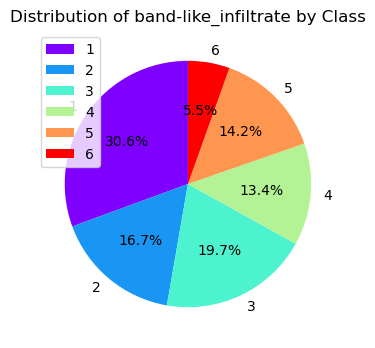

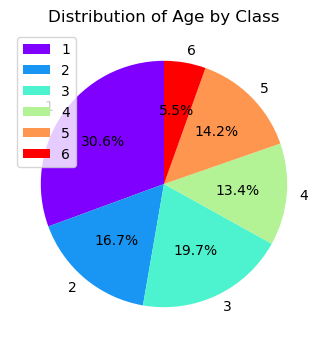

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

<Figure size 400x400 with 0 Axes>

In [98]:
# pie chart to visualize the distribution of each numerical feature with respect to the target "class".

for col in num_features:
    plt.figure(figsize=(4, 4), dpi=100)
    
    # Summing occurrences of each class per feature value
    data = df.groupby(col)['class'].value_counts().unstack()
    
    data.sum().plot.pie(autopct='%1.1f%%', startangle=90, colormap='rainbow', legend=True)
    
    plt.title(f'Distribution of {col} by Class')
    plt.ylabel('')  # Hide y-label
    plt.show()


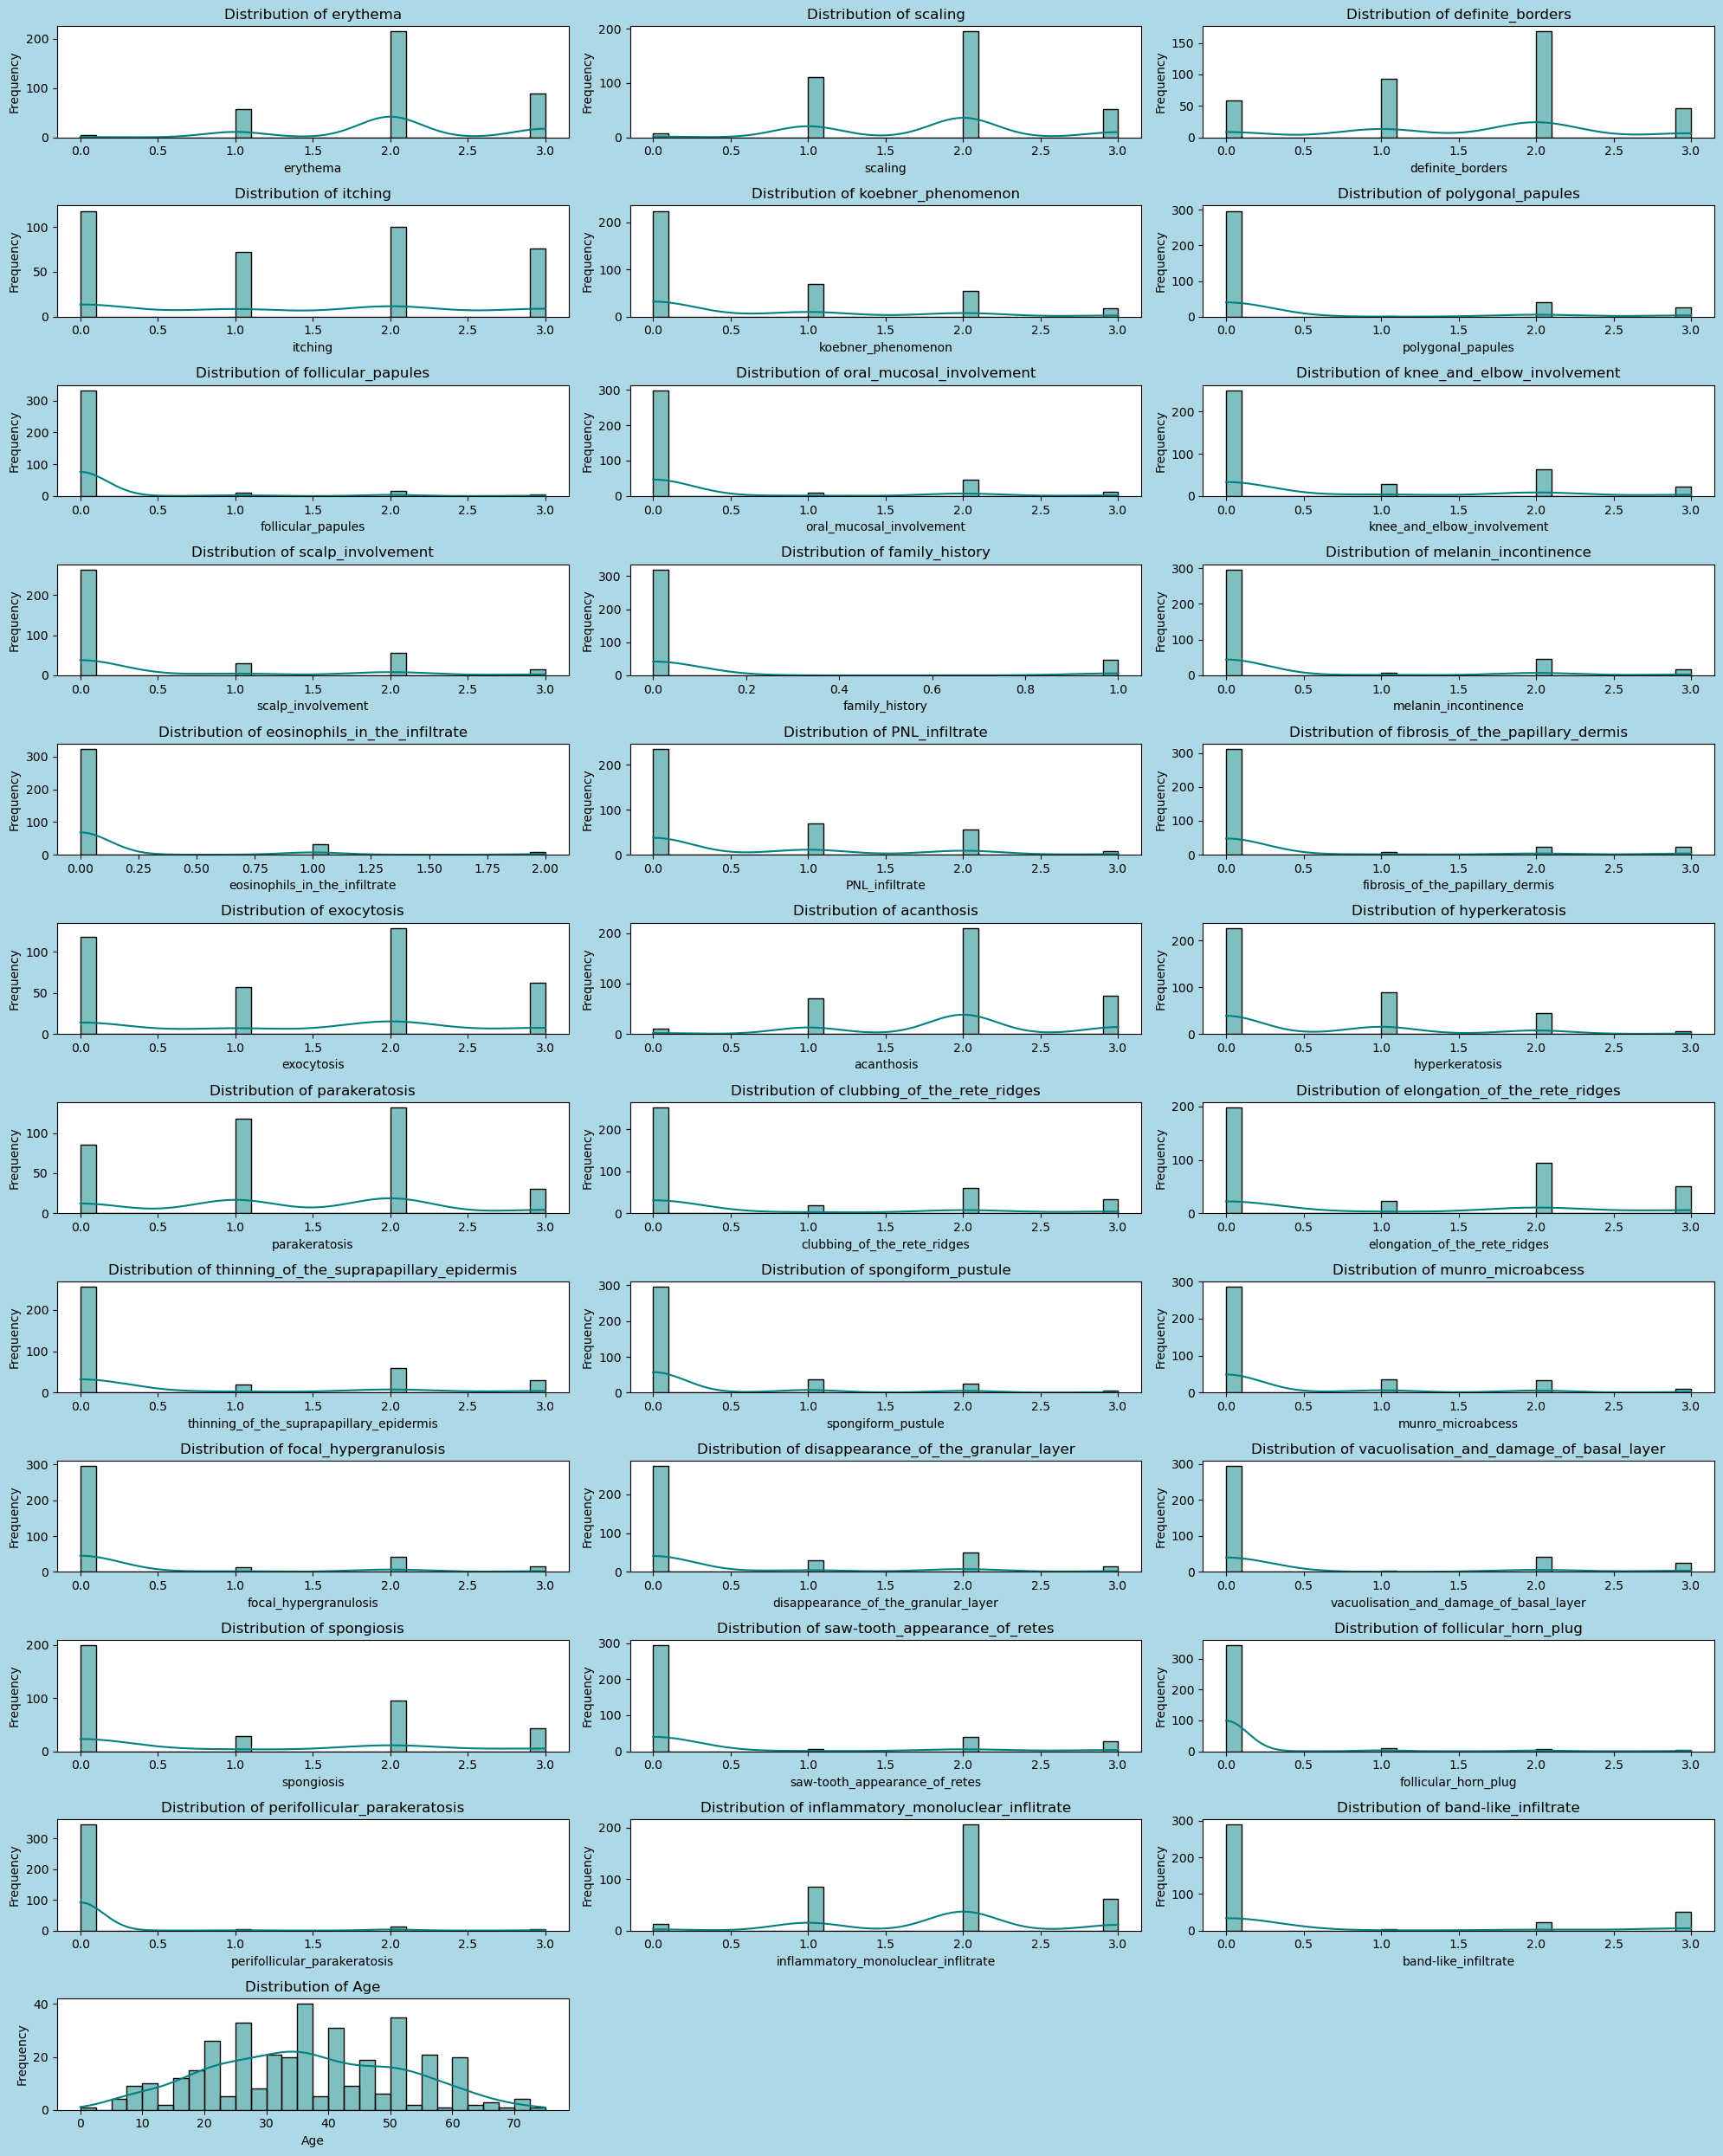

In [102]:
# UNIVARIATE ANALYSIS for all Independent columns


# Exclude target column if necessary (e.g., 'class')
independent_features = df.drop(columns=['class'], errors='ignore').columns  

plt.figure(figsize=(20, 25), facecolor='lightblue')
plotnumber = 1

# Loop through all independent features
for column in independent_features:
    ax = plt.subplot((len(independent_features) // 3) + 1, 3, plotnumber)  # Dynamic grid
    sns.histplot(df[column], kde=True, bins=30, ax=ax, color='teal')  # KDE & bins added for better visualization
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)  # Fixed incorrect ylabel
    plt.title(f'Distribution of {column}', fontsize=12)
    plotnumber += 1

plt.tight_layout()
plt.show()


# Feature Selection

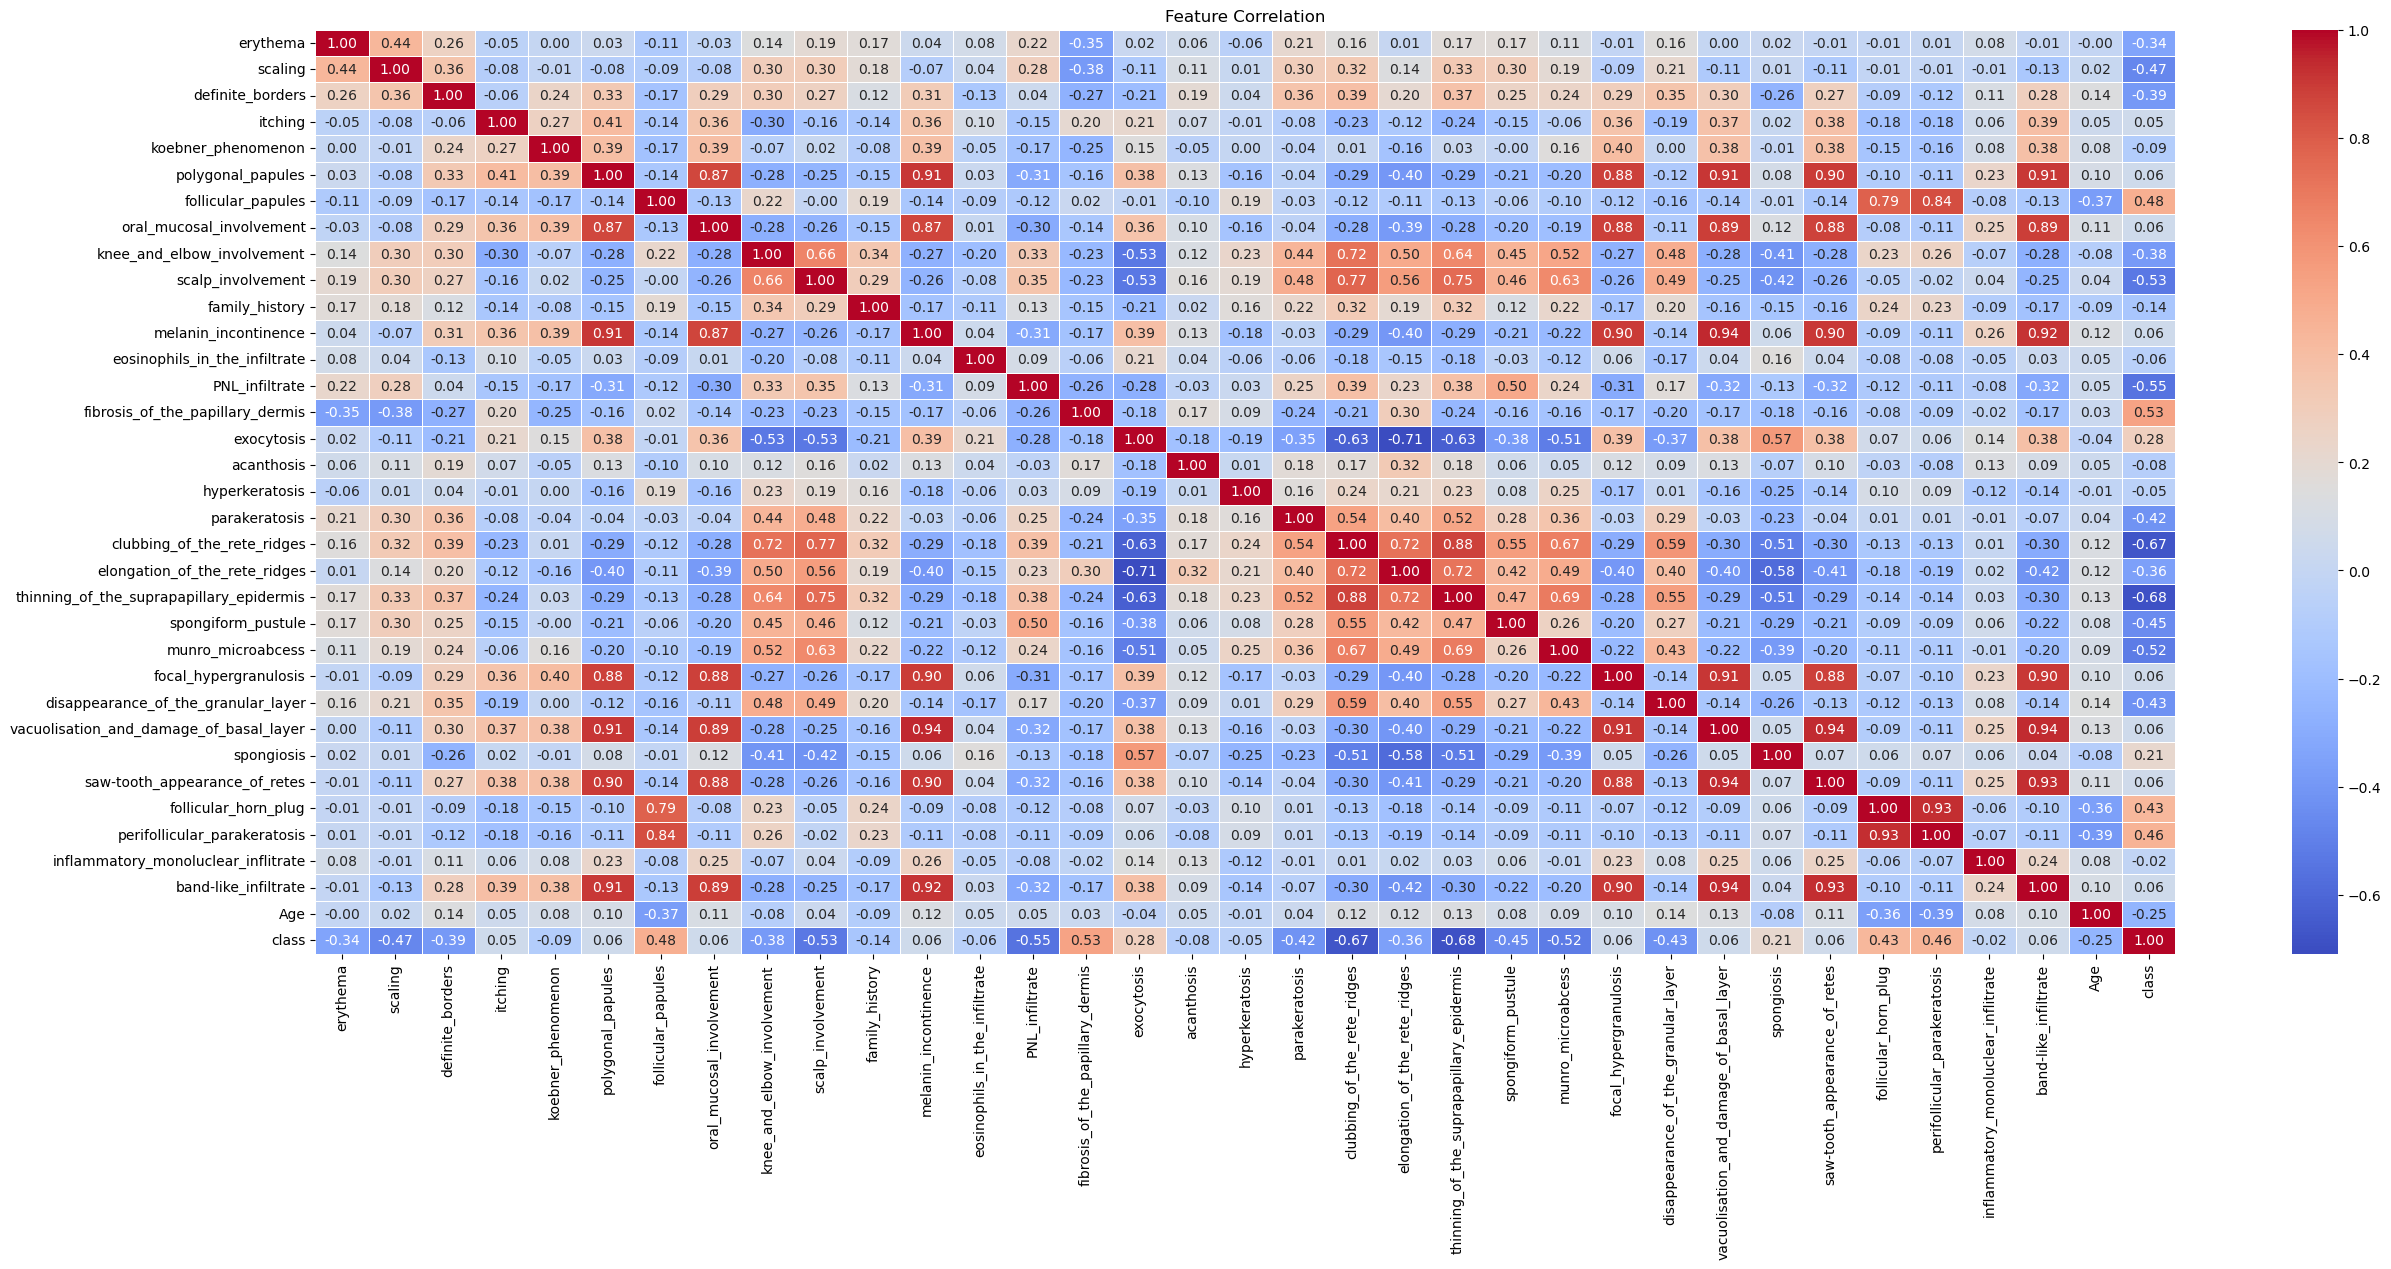

In [104]:
# Plot correlation heatmap
plt.figure(figsize=(30, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

Key Insights from Correlation Analysis
🔹 Strongly Correlated Features (Likely Related)

Melanin Incontinence & Eosinophils in the Infiltrate → 0.94 (Common in some skin disorders).
Dubbing of the Rete Ridges & Elongation of the Rete Ridges → 0.72 (Linked to psoriasis).
Spongiosis & Saw-tooth Appearance of Rete Ridges → 0.88 (Seen in inflammatory skin diseases).
🔹 Negative Correlations (Inverse Relationship)

Fibrosis of the Papillary Dermis & Koebner Phenomenon → -0.38 (If fibrosis increases, Koebner’s response is less likely).
Thinning of the Suprapapillary Epidermis & Class → -0.68 (Thinner epidermis is uncommon in certain skin disorders).
🔹 Modeling Insights
✔ Highly correlated features → Keep but avoid redundancy in models.
✔ Weakly correlated with class → May not contribute much to classification.
✔ Negative correlations → Some features help rule out conditions.

🔹 Conclusion

Most features are correlated, so feature deletion isn't ideal.
Age is not a key predictor in this dataset.

# Model Creation

In [106]:

x = df.drop('class',axis=1) #creating independent variable
x

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     focal_hypergranulosis  disappearance_of_the_granular_layer  \
0                        0                                    0   
1                        0                                    0   
2                        2                                    0   
3                        0                                    3   
4                        2                                    2   
..                     ...                                  ...   
361                      0                                    0   
362                      0                                    1   
363                      3                                    0   
364                      3                                    0   
365                      0                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of

In [109]:
y = df['class'] #Creating dependent variable
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [112]:

from sklearn.model_selection import train_test_split #importing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=30)

In [115]:
#Balancing the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [118]:
x_smote,y_smote = sm.fit_resample(x_train,y_train) #balancing training data
     

In [119]:

from collections import Counter
print('Actual Classes:',Counter(y_train))
print('Smote Classes:',Counter(y_smote))

Actual Classes: Counter({1: 84, 3: 54, 2: 45, 5: 38, 4: 35, 6: 18})
Smote Classes: Counter({1: 84, 2: 84, 4: 84, 3: 84, 5: 84, 6: 84})


In [123]:
x_train

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
205         3        2                 2        0                   0   
229         2        2                 0        2                   0   
257         3        2                 1        1                   0   
276         3        2                 2        2                   0   
180         2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
251         2        2                 2        2                   1   
309         2        3                 2        0                   1   
140         2        2                 1        2                   2   
301         3        2                 2        2                   0   
293         2        2                 3        1                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
205                  0                   0                         0   
229                  0                   0                         0   
257                  0                   0                         0   
276                  0                   0                         0   
180                  0                   0                         0   
..                 ...                 ...                       ...   
251                  2                   0                         2   
309                  0                   0                         0   
140                  0                   0                         0   
301                  2                   0                         2   
293                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
205                           2                  2  ...   
229                           0                  0  ...   
257                           0                  0  ...   
276                           2                  1  ...   
180                           2                  0  ...   
..                          ...                ...  ...   
251                           0                  0  ...   
309                           0                  1  ...   
140                           0                  0  ...   
301                           0                  0  ...   
293                           2                  2  ...   

     focal_hypergranulosis  disappearance_of_the_granular_layer  \
205                      0                                    0   
229                      0                                    0   
257                      0                                    1   
276                      0                                    2   
180                      0                                    0   
..                     ...                                  ...   
251                      2                                    0   
309                      0                                    2   
140                      0                                    0   
301                      1                                    0   
293                      0                                    3   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
205                                        0           0   
229                                        0           3   
257                                        0           1   
276                                        0           0   
180                                        0           0   
..                                       ...         ...   
251                                        2           2   
309                                        0           0   
140                                        0           2   
301                                        2           0   
293                                        0           0   

     saw-tooth_appearance_of

In [126]:
y_train

205    1
229    2
257    4
276    1
180    1
      ..
251    3
309    1
140    2
301    3
293    1
Name: class, Length: 274, dtype: int64

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr')

In [132]:
lr.fit(x_smote,y_smote)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [134]:
#importing metrics for checking score
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix

In [136]:
lr_pred = lr.predict(x_test)
lr_pred
     

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 2, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 2, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 3, 1], dtype=int64)

In [138]:
acc = accuracy_score(y_test,lr_pred)
acc

0.9891304347826086

In [141]:

f1 = f1_score(y_test,lr_pred,average='weighted')
f1

0.9890938369199239

In [144]:
print(classification_report(y_test,lr_pred))
     

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        18
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         2

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



In [147]:
confusion_matrix(y_test,lr_pred) #for checking which misclassification happened

array([[28,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0],
       [ 0,  1,  0, 13,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

In [150]:
#checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,x,y,cv=3,scoring='accuracy')
print(scores)
print('Cross Validation Score:',scores.mean())
print('Std:',scores.std())
#std of < 0.05 is good

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassi

[0.98360656 0.96721311 0.97540984]
Cross Validation Score: 0.9754098360655737
Std: 0.006692594925637106


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation
we use sklearn.metrics for getting accuracy score, f1 score, presicion score, recall score, classification report and confusion matrix.
we use accuracy score for getting how much correction prediction model did,divided by no. of correct prediction by total prediction no.
we use f1 score for getting how much precision and recall predict correctly.

## KNN

In [155]:

from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [157]:

knn.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=4)

In [159]:
knn_pred = knn.predict(x_test)
knn_pred

array([3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 4, 2, 3, 2, 2, 4, 5, 4, 5, 1, 1,
       1, 4, 4, 2, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 6, 5, 1, 1, 4, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 2, 3, 1, 6, 3, 4, 4, 2, 2, 5, 3, 3, 1, 2,
       4, 2, 2, 2, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 2, 3, 4, 2,
       1, 5, 3, 1], dtype=int64)

In [162]:
acc1 = accuracy_score(y_test,knn_pred) #checking Accuracy
acc1

0.8369565217391305

In [165]:

f1_2 = f1_score(y_test,knn_pred,average='weighted')
f1_2

0.8429307568438003

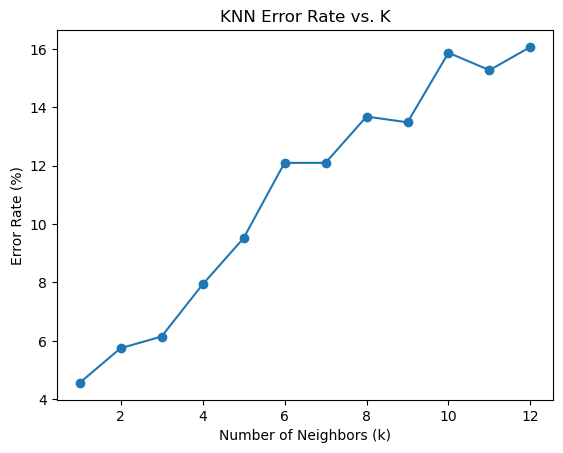

In [169]:
from sklearn.model_selection import cross_val_score

ERROR_RATE = []
for i in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=i)
    error = 1 - cross_val_score(knn, x_smote, y_smote, cv=5, scoring='accuracy').mean()
    ERROR_RATE.append(error * 100)  # Convert to percentage

plt.plot(range(1, 13), ERROR_RATE, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate (%)")
plt.title("KNN Error Rate vs. K")
plt.show()


## SVM

In [174]:

from sklearn.svm import SVC
svc = SVC(random_state=10)
svc.fit(x_smote,y_smote)
     

SVC(random_state=10)

In [176]:

svc_pred = svc.predict(x_test)
svc_pred

array([3, 3, 1, 1, 2, 1, 1, 3, 2, 1, 4, 4, 4, 3, 4, 4, 4, 5, 4, 5, 1, 1,
       1, 4, 4, 2, 4, 5, 1, 3, 5, 1, 1, 5, 6, 2, 3, 6, 5, 1, 6, 4, 3, 3,
       1, 4, 1, 1, 1, 4, 3, 1, 2, 3, 1, 6, 3, 5, 5, 2, 2, 5, 3, 3, 1, 2,
       5, 4, 4, 2, 4, 1, 4, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 6, 4,
       1, 5, 3, 1], dtype=int64)

In [179]:

f1_3 = f1_score(y_test,svc_pred,average="weighted") # checking f1 score
f1_3

0.7666745152167147

In [182]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='accuracy',cv=5)

# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [184]:
print(grid.best_params_) # checking best parameters

{'C': 10, 'gamma': 0.001, 'random_state': 1}


In [187]:
clf=SVC(C=10, gamma=0.001,random_state=1) ##put best parameters for best score
     

In [189]:
clf.fit(x_smote, y_smote) # fit the model with best parameters

SVC(C=10, gamma=0.001, random_state=1)

In [191]:
y_clf=clf.predict(x_test) # predict the model

In [193]:
acc_hy = accuracy_score(y_test,y_clf) # checking accuracy score
acc_hy

0.967391304347826

# Decision Tree

In [197]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=69)
dt.fit(x_smote,y_smote)
y_hat1 = dt.predict(x_test)
y_hat1

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 2, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 2, 3, 1, 6, 3, 5, 5, 1, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 2, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 4, 1], dtype=int64)

In [200]:

acc3 = accuracy_score(y_test,y_hat1)
acc3

0.9456521739130435

In [202]:
f1_4 = f1_score(y_test,y_hat1,average='weighted')
f1_4

0.9451987730490893

In [204]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       0.83      0.94      0.88        16
           3       1.00      0.94      0.97        18
           4       0.92      0.79      0.85        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         2

    accuracy                           0.95        92
   macro avg       0.95      0.94      0.95        92
weighted avg       0.95      0.95      0.95        92



In [207]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 30))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=99)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 6612 candidates, totalling 19836 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [216]:
tree_cv.best_params_ #getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [218]:
dt1=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 7,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'random')
     

In [219]:
dt1.fit(x_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='random')

In [220]:
y_hat1=dt1.predict(x_test)
y_hat1

array([3, 3, 1, 1, 4, 1, 1, 4, 2, 1, 2, 4, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 4, 5, 1, 4, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 4, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 3, 1], dtype=int64)

In [221]:
acc_hy1=accuracy_score(y_test,y_hat1)
acc_hy1

0.9565217391304348

In [222]:

test_f1 = f1_score(y_test,y_hat1,average='weighted')
test_f1

0.9583256144482529

# ANN

In [230]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,6),
                       learning_rate_init=0.001,
                       max_iter=200,random_state=99)
model.fit(x_smote,y_smote)
     

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 6), random_state=99)

In [232]:
y_predict_proba = model.predict(x_test)
y_predict_proba

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 2, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 4, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 3, 1], dtype=int64)

In [239]:
acc5 = accuracy_score(y_test,y_predict_proba)
acc5
     

0.9782608695652174

In [240]:

f1_6 = f1_score(y_test,y_predict_proba,average='weighted')
f1_6
     

0.9782608695652174

# Model Comparison Report

In [248]:
# Creating model comparison report using DataFrame
score = pd.DataFrame({
    "Model": ["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier", "ANN_MLPClassifier"],  
    "Accuracy": [acc * 100, acc1 * 100, acc3 * 100, acc5 * 100],  # Removed acc2
    "With Hyperparameter Tuning": ["No Available", "No Available", acc_hy1 * 100, "No Available"],
    "F1_Score": [f1, f1_2, f1_4, f1_6]  # Removed f1_3
})

# Display the score DataFrame
print(score)


                    Model   Accuracy With Hyperparameter Tuning  F1_Score
0      LogisticRegression  98.913043               No Available  0.989094
1    KNeighborsClassifier  83.695652               No Available  0.842931
2  DecisionTreeClassifier  94.565217                  95.652174  0.945199
3       ANN_MLPClassifier  97.826087               No Available  0.978261


#### Conclusion of Model Comparison Report
I have used 4 Algorithmns which name are LogisticRegression,KNeighborsClassifier, Support Vector Classifier, DecisionTreeClassifier and ANN_MLPClassifier for training the model. I got 100.00 percentage in LogisticRegression and also in Decision tree an ANN which are maximum than all Algorithmn and its working Mindblowing and error rate only 0.01 which are minor error and model predict perfect results. So, I am preffering LogisticRegression and ANN for identify the skin diseases of the patient at the earliest time.

### Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

Skin Disease Classification Insights
1️⃣ Highest Chances of Class 1 (Psoriasis)
✅ Patients without the following features have the highest probability of Psoriasis:

Itching, Koebner Phenomenon, Polygonal Papules, Follicular Papules
Oral Mucosal Involvement, Melanin Incontinence, Eosinophils in the Infiltrate
PNL Infiltrate, Fibrosis of the Papillary Dermis, Exocytosis
Hyperkeratosis, Spongiform Pustule, Munro Microabscess
Focal Hypergranulosis, Disappearance of the Granular Layer
Vacuolization & Damage of the Basal Layer, Spongiosis, Saw Teeth Appearance of Rete Ridges
Follicular Horn Plug, Perifollicular Parakeratosis, Band-like Infiltrate
2️⃣ Highest Chances of Class 2 (Seborrheic Dermatitis)
✅ Patients without these features are most likely to have Seborrheic Dermatitis:

Definite Border, Koebner Phenomenon, Polygonal Papules, Follicular Papules
Oral Mucosal Involvement, Knee & Elbow Involvement, Scalp Involvement
Melanin Incontinence, Eosinophils in the Infiltrate
Fibrosis of the Papillary Dermis, Acanthosis, Hyperkeratosis
Parakeratosis, Clubbing & Elongation of the Rete Ridges
Thinning of the Suprapapillary Epidermis, Spongiform Pustule
Munro Microabscess, Focal Hypergranulosis, Disappearance of the Granular Layer
Vacuolization & Damage of the Basal Layer, Saw-Tooth Appearance of Rete Ridges
Follicular Horn Plug, Perifollicular Parakeratosis, Inflammatory Mononuclear Infiltrate, Band-like Infiltrate
3️⃣ Highest Chances of Class 3 (Lichen Planus)
✅ Absence of these features indicates Lichen Planus:

Koebner Phenomenon, Follicular Papules, Knee & Elbow Involvement, Scalp Involvement
Eosinophils in the Infiltrate, PNL Infiltrate, Fibrosis of the Papillary Dermis
Hyperkeratosis, Parakeratosis, Clubbing & Elongation of the Rete Ridges
Thinning of the Suprapapillary Epidermis, Spongiform Pustule, Munro Microabscess
Disappearance of the Granular Layer, Spongiosis, Perifollicular Parakeratosis
4️⃣ Highest Chances of Class 4 (Pityriasis Rosea)
✅ Patients without these features are more likely to have Pityriasis Rosea:

Definite Border, Itching, Koebner Phenomenon, Polygonal Papules, Follicular Papules
Oral Mucosal Involvement, Knee & Elbow Involvement, Scalp Involvement
Melanin Incontinence, Eosinophils in the Infiltrate, PNL Infiltrate
Fibrosis of the Papillary Dermis, Acanthosis, Hyperkeratosis
Parakeratosis, Clubbing & Elongation of the Rete Ridges
Thinning of the Suprapapillary Epidermis, Spongiform Pustule, Munro Microabscess
Focal Hypergranulosis, Disappearance of the Granular Layer, Vacuolization of Basal Layer
Saw-Tooth Appearance of Rete Ridges, Follicular Horn Plug, Perifollicular Parakeratosis
Band-like Infiltrate
5️⃣ Highest Chances of Class 5 (Chronic Dermatitis)
✅ Absence of these features points to Chronic Dermatitis:

Erythema, Definite Border, Scaling, Itching, Koebner Phenomenon
Polygonal Papules, Follicular Papules, Oral Mucosal Involvement
Knee & Elbow Involvement, Scalp Involvement, Melanin Incontinence
Eosinophils in the Infiltrate, PNL Infiltrate, Exocytosis
Hyperkeratosis, Parakeratosis, Clubbing of Rete Ridges
Thinning of Suprapapillary Epidermis, Spongiform Pustule, Munro Microabscess
Focal Hypergranulosis, Disappearance of the Granular Layer
Vacuolization of Basal Layer, Spongiosis, Saw-Tooth Appearance of Rete Ridges
Follicular Horn Plug, Perifollicular Parakeratosis, Band-like Infiltrate
6️⃣ Highest Chances of Class 6 (Pityriasis Rubra Pilaris)
✅ Patients without these features are more prone to Pityriasis Rubra Pilaris:

Definite Border, Itching, Koebner Phenomenon, Polygonal Papules, Munro Microabscess
Oral Mucosal Involvement, Scalp Involvement, Melanin Incontinence
Eosinophils in the Infiltrate, PNL Infiltrate, Fibrosis of the Papillary Dermis
Clubbing & Elongation of the Rete Ridges, Spongiform Pustule
Thinning of Suprapapillary Epidermis, Focal Hypergranulosis, Disappearance of Granular Layer
Saw-Tooth Appearance of Rete Ridges, Vacuolization of Basal Layer, Band-like Infiltrate
🔍 Insights for Diagnosis
 Intermediate Level of Skin Diseases:

Certain intermediate levels of Erythema, Scaling, Acanthosis, Hyperkeratosis, and Inflammatory Infiltrates indicate specific classes.
For example, intermediate levels of exocytosis, spongiosis, and inflammatory mononuclear infiltrates suggest Class 4 (Pityriasis Rosea).
 High Chances of Skin Disease:

If a patient has a high presence of erythema, scaling, definite borders, itching, knee & elbow involvement, and various histopathological features, they almost certainly belong to a specific class.
 Family History Influence:

Patients with no family history of skin diseases are more prone to Class 1 & Class 3.
Patients with a family history have a higher chance of Class 1 & Class 6.
 By following these insights, doctors can efficiently classify and diagnose skin disorders.

 nfluence of Family History

Patients with no family history of skin disease have a high chance of having Class 1 (Psoriasis) and Class 3 (Lichen Planus), with a 50-50% chance of Class 2 (Seborrheic Dermatitis), Class 4 (Pityriasis Rosea), and Class 5 (Chronic Dermatitis).

Patients with a family history of skin disease have a high chance of having Class 1 (Psoriasis) and Class 6 (Pityriasis Rubra Pilaris).

By following these instructions, doctors can efficiently identify and diagnose different classes of skin disorders


Skin Disease Classification Insights
1️ Highest Chances of Class 1 (Psoriasis)
__ Patients without the following features have the highest probability of Psoriasis:

Itching, Koebner Phenomenon, Polygonal Papules, Follicular Papules
Oral Mucosal Involvement, Melanin Incontinence, Eosinophils in the Infiltrate
PNL Infiltrate, Fibrosis of the Papillary Dermis, Exocytosis
Hyperkeratosis, Spongiform Pustule, Munro Microabscess
Focal Hypergranulosis, Disappearance of the Granular Layer
Vacuolization & Damage of the Basal Layer, Spongiosis, Saw Teeth Appearance of Rete Ridges
Follicular Horn Plug, Perifollicular Parakeratosis, Band-like Infiltrate
2️ Highest Chances of Class 2 (Seborrheic Dermatitis)
__ Patients without these features are most likely to have Seborrheic Dermatitis:

Definite Border, Koebner Phenomenon, Polygonal Papules, Follicular Papules
Oral Mucosal Involvement, Knee & Elbow Involvement, Scalp Involvement
Melanin Incontinence, Eosinophils in the Infiltrate
Fibrosis of the Papillary Dermis, Acanthosis, Hyperkeratosis
Parakeratosis, Clubbing & Elongation of the Rete Ridges
Thinning of the Suprapapillary Epidermis, Spongiform Pustule
Munro Microabscess, Focal Hypergranulosis, Disappearance of the Granular Layer
Vacuolization & Damage of the Basal Layer, Saw-Tooth Appearance of Rete Ridges
Follicular Horn Plug, Perifollicular Parakeratosis, Inflammatory Mononuclear Infiltrate, Band-like Infiltrate3️
3 Highest Chances of Class 3 (Lichen Planus)
__ Absence of these features indicates Lichen Planus:

Koebner Phenomenon, Follicular Papules, Knee & Elbow Involvement, Scalp Involvement
Eosinophils in the Infiltrate, PNL Infiltrate, Fibrosis of the Papillary Dermis
Hyperkeratosis, Parakeratosis, Clubbing & Elongation of the Rete Ridges
Thinning of the Suprapapillary Epidermis, Spongiform Pustule, Munro Microabscess
Disappearance of the Granular Layer, Spongiosis, Perifollicular Parakeratosis4️__ Highest Chances of Class 4 (Pityriasis Rosea)
__ Patients without these features are more likely to have Pityriasis Rosea:

Definite Border, Itching, Koebner Phenomenon, Polygonal Papules, Follicular Papules
Oral Mucosal Involvement, Knee & Elbow Involvement, Scalp Involvement
Melanin Incontinence, Eosinophils in the Infiltrate, PNL Infiltrate
Fibrosis of the Papillary Dermis, Acanthosis, Hyperkeratosis
Parakeratosis, Clubbing & Elongation of the Rete Ridges
Thinning of the Suprapapillary Epidermis, Spongiform Pustule, Munro Microabscess
Focal Hypergranulosis, Disappearance of the Granular Layer, Vacuolization of Basal Layer
Saw-Tooth Appearance of Rete Ridges, Follicular Horn Plug, Perifollicular Parakeratosis
Band-like Infiltrate
5️__ Highest Chances of Class 5 (Chronic Dermatitis)
__ Absence of these features points to Chronic Dermatitis:

Erythema, Definite Border, Scaling, Itching, Koebner Phenomenon
Polygonal Papules, Follicular Papules, Oral Mucosal Involvement
Knee & Elbow Involvement, Scalp Involvement, Melanin Incontinence
Eosinophils in the Infiltrate, PNL Infiltrate, Exocytosis
Hyperkeratosis, Parakeratosis, Clubbing of Rete Ridges
Thinning of Suprapapillary Epidermis, Spongiform Pustule, Munro Microabscess
Focal Hypergranulosis, Disappearance of the Granular Layer
Vacuolization of Basal Layer, Spongiosis, Saw-Tooth Appearance of Rete Ridges
Follicular Horn Plug, Perifollicular Parakeratosis, Band-like Infiltrate
__ Highest Chances of Class 6 (Pityriasis Rubra Pilaris)
__ Patients without these features are more prone to Pityriasis Rubra Pilaris:

Definite Border, Itching, Koebner Phenomenon, Polygonal Papules, Munro Microabscess
Oral Mucosal Involvement, Scalp Involvement, Melanin Incontinence
Eosinophils in the Infiltrate, PNL Infiltrate, Fibrosis of the Papillary Dermis
Clubbing & Elongation of the Rete Ridges, Spongiform Pustule
Thinning of Suprapapillary Epidermis, Focal Hypergranulosis, Disappearance of Granular Layer
Saw-Tooth Appearance of Rete Ridges, Vacuolization of Basal Layer, Band-like Infiltrate
 Insights for Diagnosis
 Intermediate Level of Skin Diseases:

Certain intermediate levels of Erythema, Scaling, Acanthosis, Hyperkeratosis, and Inflammatory Infiltrates indicate specific classes.
For example, intermediate levels of exocytosis, spongiosis, and inflammatory mononuclear infiltrates suggest Class 4 (Pityriasis Rosea).
 High Chances of Skin Disease:

If a patient has a high presence of erythema, scaling, definite borders, itching, knee & elbow involvement, and various histopathological features, they almost certainly belong to a specific class.
 Family History Influence:

Patients with no family history of skin diseases are more prone to Class 1 & Class 3.
Patients with a family history have a higher chance of Class 1 & Class 6.
 By following these insights, doctors can efficiently classify and diagnose skin disorders

          High chances of skin dieases.
A Patient who have largest amount possible of erythema,scaling,definite border,itiching,knee and elbow envolvement,scalp envolvement,PNL infiltrate,acanthosis,hyperkeratosis,perekeratosis,clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess, disappearance_of_the_granular_layer,inflammatory_monoluclear_inflitrate they all have highest chance of having class 1 (psoriasis) skin disorder problem.
A Patient who have largest amount possible of erythema,scaling,itiching,eosinophils_in_the_infiltrate,PNL infiltrate,exocytosis,acanthosis,spongiosis,inflammatory_monoluclear_inflitrate they all have highest chance of having class 2 (seboreic dermatitis) skin disorder problem.
A Patient who have largest amount possible of erythema,scaling,definite border,itiching,koebner_phenomenon, polygonal_papules,band-like_infiltrate oral_mucosal_involvement,melanin_incontinence,exocytosis,acanthosis, focal_hypergranulosis,spongiosis,vacuolisation_and_damage_of_basal_layer,saw-tooth_appearance_of_retes, inflammatory_monoluclear_inflitrate they all having highest chance of class 3 (lichen planus) skin disorder problem.
A Patient who have largest amount possible of erythema,koebner_phenomenon,exocytosis,spongiosis, inflammatory_monoluclear_inflitrate they all have highest chance of having class 4 (pityriasis rosea) skin disorder problem.
A Patient who have largest amount possible of erythema,scaling,definite border,itiching,fibrosis_of_the_papillary_dermis, acanthosis,elongation_of_the_rete_ridges,inflammatory_monoluclear_inflitrate they all have highest chance of having class 5 (cronic dermatitis) skin disorder problem.
A Patient who have largest amount possible of erythema,follicular_papules,knee_and_elbow_involvement,exocytosis, spongiosis,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate they all have highest chance of having class 6 (pityriasis rubra pilaris) skin disorder problem.
Patient whose family has no skin dieases they have high chance of having class 1 and 3, and 50-50% chance of 2,4 and 5 and those patient which family has skin dieases they have high chance of having class 1 and 6.

By follow this all instructions doctors can find any skin disorder of class 6 class qiuckly.


Report on Challenges I faced
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal. This is a skin dieases dataset which 366 entries, 0 to 365 total columns and total 35 columns it has only one columns having object type and all of them are integers type. In this dataset most tough things are getting insights from data after working of 1 to 2 days I got insights. After thats every things are easy I did very easily and no more challenges I faced in this datasets.